
##**⚈ 𝙁𝙪𝙡𝙡 𝙉𝙖𝙢𝙚: 𝙈𝙤𝙝𝙖𝙢𝙢𝙖𝙙 𝙨𝙝𝙞𝙧𝙨𝙝𝙚𝙠𝙖𝙧**
##**⚈ 𝙎𝙩𝙪𝙙𝙚𝙣𝙩 𝙉𝙪𝙢𝙗𝙚𝙧: NAN**

# Applied Linear Algebra - Lab 3
Ferdowsi University of Mashhad - Computer Engineering Department

Fall 2021

### Table of Contents
* [Singular Value Decomposition](#SVD)
* [Image Compression](#Image-Compression)
* [Removing Background](#Removing-Background)


# SVD
The Singular Value Decomposition (SVD) separates any matrix into simple pieces. it provides a numerically stable matrix decomposition that can be used for
a variety of purposes and is guaranteed to exist

In many domains, complex systems will generate data that is naturally arranged in
large matrices, or more generally in arrays. For example, a time-series of data from an
experiment or a simulation may be arranged in a matrix with each column containing all of
the measurements at a given time. 

The pixel values in a grayscale image may be stored in a matrix,
or these images may be reshaped into large column vectors in a matrix to represent the
frames of a movie. Remarkably, the data generated by these systems are typically low rank,
meaning that there are a few dominant patterns that explain the high-dimensional data. The
SVD is a numerically robust and efficient method of extracting these patterns from data.


Generally, we are interested in analyzing a large data set $X_{n \times m}$:

$$
X = \begin{bmatrix}
\mid & \mid & & \mid \\
{\bf x}_{1} & {\bf x}_{2} & \cdots & {\bf x}_{m}\\
\mid & \mid & & \mid \\
\end{bmatrix}
$$

The columns $x_k \in C_n$ may be measurements from simulations or experiments. For example, columns may represent images that have been reshaped into column vectors with as
many elements as pixels in the image.


The SVD is a unique matrix decomposition that exists for every matrix
 $X_{n \times m}$:
 
$$
\bf X = \bf U \times \Sigma \times \bf V^\intercal
$$

where $ \bf U_{n \times n}$ is a matrix containing unit eigenvectors of $X X^\intercal$ and $\bf V_{m \times m}$ is containing unit eigenvectors of $X^\intercal X$.

$ \bf \Sigma$ is a diagonal matrix containing square roots of the equal eigenvalues of $ X X^\intercal$ and $X^\intercal X$ (Singular Values $\sigma$.)

![svd.png](attachment:svd.png)



In [ ]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import sys, os
import scipy

## Exercise 1
Define function `svd` which takes matrix $ \bf X_{n \times m}$ and applies SVD decomposition then returns $ \bf U_{n \times n} , \bf \Sigma_{n \times m},  \bf V^\intercal_{m \times m} $

<!-- BEGIN QUESTION -->



In [ ]:
from numpy.linalg import eig
from numpy import argsort
from numpy import diag

def svd(X):
    # compute X.T * X
    xtx = np.transpose(X) @ X
  
    # calculate eigenvalues and eigenvectors of XTX
    # use linalg.eig() function, it returns eigenvalues and normalized (unit length) eigenvectors,
    # such that the column v[:,i]
    # is the eigenvector corresponding to the eigenvalue eigen_vals[i]
    eig_vals, V = np.linalg.eig(xtx)
    
    # singular values of X are the square root of the non-negative eigenvalues of XtX or XXt
    singular_vals = np.sqrt(eig_vals)
    
    # sort both sigular values and matrix V in descending order so that the higher values are placed before the lower ones.
    # use np.argsort(), it returns the indices that would sort an array, use the indcies to sort V based on singular values order
    sort_indices = np.argsort(singular_vals)
    sort_indices = sort_indices[::-1] #descending
    singular_vals = singular_vals[sort_indices]
    V = V[np.argsort(singular_vals)]
    
    # U is matrix of eigenvectors of XXT
    # for every eigenvector of XXT (Ui):
    # Ui = (X @ Vi / singularValue(i))
    U = X @ V / singular_vals
    
    # sigma matrix is a diagonal matirx with singular values of X in its diagonal
    # singluar_vals is an array of singular values of X, we can use np.diag() to make sigma matrix using singular_vals
    sigma = np.diag(singular_vals)
    
    return U.real, sigma.real, V.T.real

In [ ]:
xx = np.random.random((5, 5))
print(xx)
ux, sx, vx = svd(xx)
print(ux ,"\n", sx, "\n", vx)

[[0.51036094 0.81559044 0.65250783 0.49898062 0.16453152]
 [0.25320512 0.89739932 0.11092099 0.63078212 0.39906181]
 [0.49338509 0.85535684 0.21865957 0.46161641 0.54099631]
 [0.49991524 0.06836925 0.77846771 0.6213342  0.8860027 ]
 [0.81682334 0.07111483 0.22268564 0.39902332 0.05721993]]
[[ 0.48117865  0.11297421  0.44876493  0.7815348  -1.02540842]
 [ 0.44188255 -0.25219654 -0.11730903  0.9619081   1.08652967]
 [ 0.47939031  0.05348985 -0.02519113  0.64983184  1.47024398]
 [ 0.50950528  0.22788167 -0.34145689 -1.34239843 -1.27115606]
 [ 0.27750133  0.03692558  0.8399986  -0.76649704  0.6144165 ]] 
 [[2.4405864  0.         0.         0.         0.        ]
 [0.         0.95149142 0.         0.         0.        ]
 [0.         0.         0.65568899 0.         0.        ]
 [0.         0.         0.         0.42696572 0.        ]
 [0.         0.         0.         0.         0.19227373]] 
 [[ 0.3990431   0.47948337  0.37879347  0.51994145  0.44388816]
 [ 0.30035874  0.04612605  0.424357

In [ ]:
print(ux @ sx @ vx)

[[0.51036094 0.81559044 0.65250783 0.49898062 0.16453152]
 [0.25320512 0.89739932 0.11092099 0.63078212 0.39906181]
 [0.49338509 0.85535684 0.21865957 0.46161641 0.54099631]
 [0.49991524 0.06836925 0.77846771 0.6213342  0.8860027 ]
 [0.81682334 0.07111483 0.22268564 0.39902332 0.05721993]]


<!-- END QUESTION -->

# Image Compression


Images are represented in a rectangular array where each element corresponds to the grayscale value for that pixel. For colored images we have a 3-dimensional array of size n×m×3, where n and m represent the number of pixels vertically and horizontally, respectively, and for each pixel we store the intensity for colors red, green and blue.
What we are going to do is to repeat the low-rank approximation procedure that we was introduced in the lectures on a larger matrix, that is, we create the low-rank approximation of a matrix that represents an image for each color separately. The resulting 3-dimensional array will be a good approximation of the original image. 
Let’s say that you have a grayscale image that is 100 × 100 pixels in dimension. Each of those pixels can be represented in a matrix that is also 100 × 100, where the values in the matrix range from 0 to 255 (or from 0.0 to 1.0. These values represent intensity). 

Now, if you wanted to store that image, you would have to keep track of exactly 100 × 100 numbers or 10,000 different pixel values. That may not seem like a lot, but you can also think if the image as your desktop background which is probably and image 1920 × 1200 in which you would have to store 2,304,000 different pixel values! And that’s if it was a grayscale image, if it was colored, it would be triple that, having to keep track of 6,912,000 different numbers, which if you think about one of those numbers equating to a byte on your computer, that equals 2.3MB for a grayscale image or 6.9MB for a colored image. Just imagine how quickly a movie would increase in size if it was updating at the rate of 30-60 frames per second. What we can actually do to save memory on our image is to compute the SVD and then calculate some level of precision. You would find that in an image that is 100 × 100 pixels would look really quite good with only 10 modes of precision using the SVD computation. The reason why the SVD is computed is because you can use the first components of these matrices to give you a close approximation of what the actual matrix looked like.


![image.png](attachment:814325a1-e00a-42ec-ba42-6768c2b4a58f.png)

## Exercise 2
Let's implement this procedure.

<!-- BEGIN QUESTION -->



image dimensions: (1280, 960, 3)
grayscale image dimensions: (1280, 960)


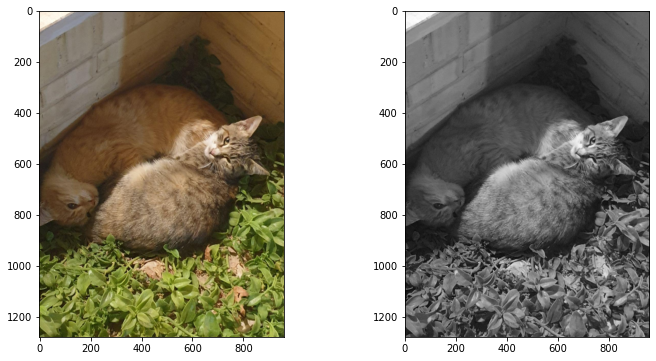

In [ ]:
img = imread('mohandesi-kittens.jpg')
img = img.astype(float) / np.iinfo(img.dtype).max

img_grayscale = np.mean(img, -1)

n, m = img_grayscale.shape


plt.figure(0, (12,6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(img_grayscale, cmap='gray')
print(f'image dimensions: {img.shape}')
print(f'grayscale image dimensions: {img_grayscale.shape}')

In [ ]:
# Suppose the basic unit of space is an element of a matrix. For example a 2 x 3 matrix requires 6 unit of space.
def storage_reduction(r, n, m):
    # Original matrix is n x m
    original = n * m
    
    # U: n * r
    # For S we only need to hold the r singular values. We can always reconstruct the diagonal matrix S from the singlar values.
    # S: r
    # VT: r * m
    compressed = n * r + r + r * m
    return 100 - (compressed / original) * 100

Calculate the singular value decomposition of the grayscale image.

In [ ]:
U, S, VT = svd(img_grayscale)

print(f'U: {U.shape},   S: {S.shape},   VT: {VT.shape}')

U: (1280, 960),   S: (960, 960),   VT: (960, 960)


Approximate the grayscale image using only the first `r` singular values.

Text(0.5, 1.0, 'original image')

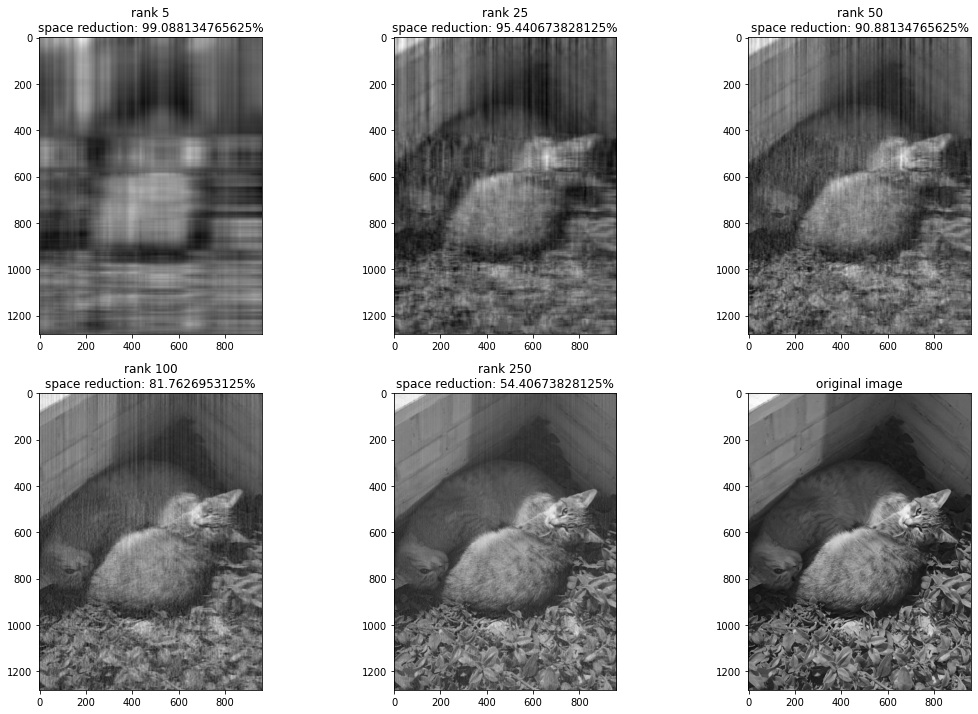

In [ ]:
ranks = [5, 25, 50, 100, 250]

plt.figure(0, (18, 12))
for idx, r in enumerate(ranks):
    
    U_r = U[0:n,0:r]
    S_r = S[0:r,0:r]
    VT_r = VT[0:r,0:m]
    
    A_r = (U_r @ S_r @ VT_r)

    plt.subplot(2,3, idx+1)
    plt.imshow(A_r, cmap='gray')
    plt.title(f'''rank {r}\nspace reduction: {storage_reduction(r, n, m)}%''')
    
plt.subplot(2, 3, idx+2)
plt.imshow(img_grayscale, cmap='gray')
plt.title('original image')

Find a value of `r` that results in approximately 70% reduction in space.

Text(0.5, 1.0, 'original image')

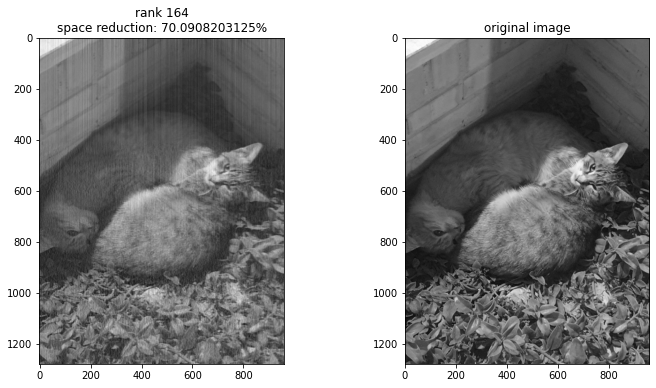

In [ ]:
r = 164
U_r = U[0:n,0:r]
S_r = S[0:r,0:r]
VT_r = VT[0:r,0:m]

A_r = (U_r @ S_r @ VT_r)

plt.figure(0, (12,6))
plt.subplot(1, 2, 1)
plt.imshow(A_r, cmap='gray')
plt.title(f'''rank {r}\nspace reduction: {storage_reduction(r, n, m)}%''')
plt.subplot(1, 2, 2)
plt.imshow(img_grayscale, cmap='gray')
plt.title('original image')

Find a value of `r` that results in approximately 50% reduction in space.

Text(0.5, 1.0, 'original image')

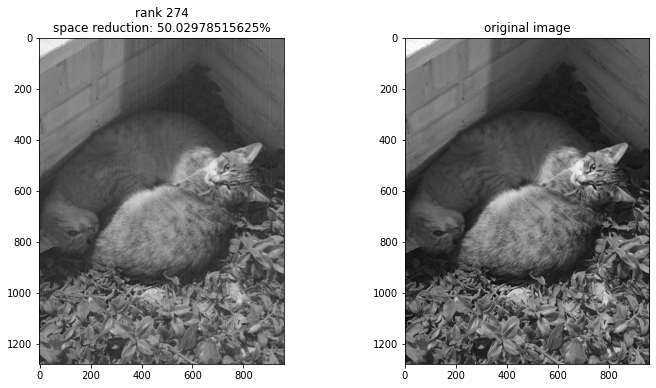

In [ ]:
r = 274
U_r = U[0:n,0:r]
S_r = S[0:r,0:r]
VT_r = VT[0:r,0:m]

A_r = (U_r @ S_r @ VT_r)

plt.figure(0, (12,6))
plt.subplot(1, 2, 1)
plt.imshow(A_r, cmap='gray')
plt.title(f'''rank {r}\nspace reduction: {storage_reduction(r, n, m)}%''')
plt.subplot(1, 2, 2)
plt.imshow(img_grayscale, cmap='gray')
plt.title('original image')

Approximate the colored image using only the first `r` singular values.

Text(0.5, 1.0, 'original image')

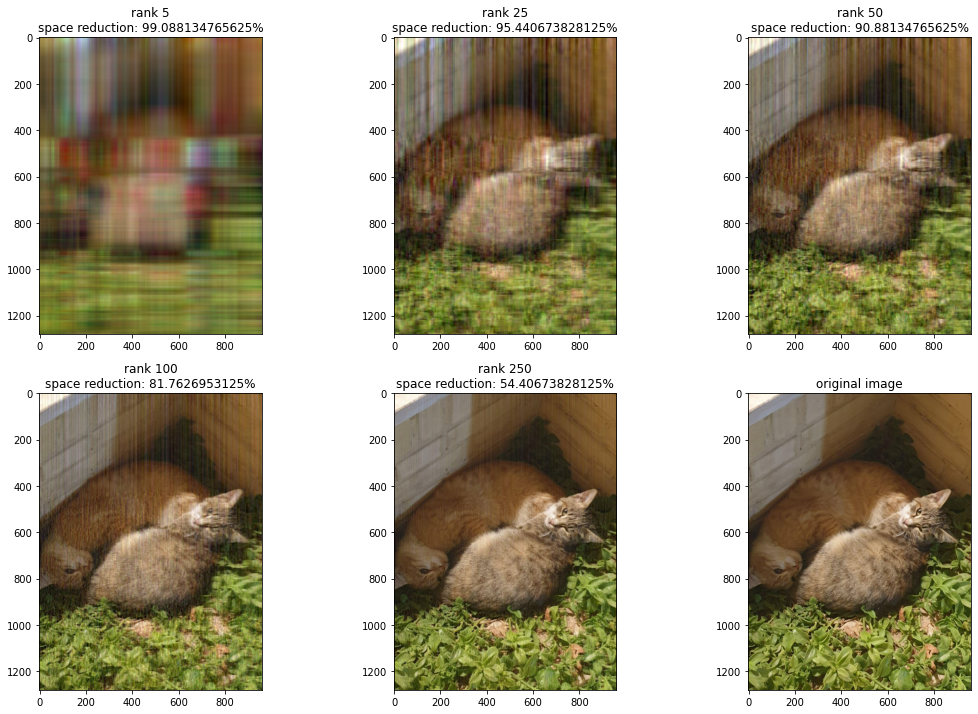

In [ ]:
ranks = [5, 25, 50, 100, 250]

img_red, img_green, img_blue =  img[:, :, 0], img[:, :, 1], img[:, :, 2]

U_R, S_R, VT_R = svd(img_red)
U_G, S_G, VT_G = svd(img_green)
U_B, S_B, VT_B = svd(img_blue)
    

plt.figure(0, (18, 12))
for idx, r in enumerate(ranks):
    
    # Red
    U_R_r = U_R[0:n,0:r]
    S_R_r = S_R[0:r,0:r]
    VT_R_r = VT_R[0:r,0:m]
    A_R_r = (U_R_r @ S_R_r @ VT_R_r)

    # Green
    U_G_r = U_G[0:n,0:r]
    S_G_r = S_G[0:r,0:r]
    VT_G_r = VT_G[0:r,0:m]
    A_G_r = (U_G_r @ S_G_r @ VT_G_r)
    
    # Blue
    U_B_r = U_B[0:n,0:r]
    S_B_r = S_B[0:r,0:r]
    VT_B_r = VT_B[0:r,0:m]
    A_B_r = (U_B_r @ S_B_r @ VT_B_r)
    
    # Stack 'em together!
    A_r = np.dstack((A_R_r, A_G_r, A_B_r))
    
    plt.subplot(2,3, idx+1)
    plt.imshow(np.clip(A_r, 0, 1), cmap='gray')
    plt.title(f'''rank {r}\nspace reduction: {storage_reduction(r, n, m)}%''')
    
plt.subplot(2, 3, idx+2)
plt.imshow(img, cmap='gray')
plt.title('original image')

<!-- END QUESTION -->

# Removing Background
An important task when processing sensor data is to distinguish relevant from irrelevant data. With static cameras, for example in video surveillance, the background, like houses or trees, stays mostly constant over a series of frames, whereas the foreground consisting of objects of interest, e.g., cars or humans, causes differences in image sequences. Background subtraction aims to distinguish between foreground and background based on previous image sequences and eliminates the background from newly incoming frames, leaving only the moving objects contained in the foreground. These are usually the objects of interest in surveillance.

As stated in the lectures, SVD decomposes a given matrix into three matrices:
These three matrices include U, Sigma(Σ), and V.
We will use these matrices to form a low-rank matrix, which will eventually help us to extract the background from the video.
The low-rank matrix is actually an approximation of the original matrix. As we increase the rank of this matrix we get closer to the original matrix.
In natural images, we know there are a lot of dependencies between the pixels, no sudden change occurs in the images. Most of the columns are dependent on each other. So, taking it as an advantage, we can approximate natural images with a low-rank matrix and in some cases, we get high accuracy.

Since backgrounds don't change much and most of the video is composed of frames that have a lot of background pixels, this low-rank approximation discards sudden changes (the people moving) and keeps the main parts of the video (the background).

<!-- BEGIN QUESTION -->

![image.png](attachment:image.png)

In [ ]:
#first of all, we need to install movieoy library!!!
import imageio
!pip install --upgrade moviepy
!pip install imageio-ffmpeg


In [1]:
import moviepy.editor as mpe
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import scipy

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1843200/45929032 bytes (4.0%)4161536/45929032 bytes (9.1%)7102464/45929032 bytes (15.5%)10067968/45929032 bytes (21.9%)12992512/45929032 bytes (28.3%)16048128/45929032 bytes (34.9%)18997248/45929032 bytes (41.4%)22069248/45929032 bytes (48.1%)24920064/45929032 bytes (54.3%)27951104/45929032 bytes (60.9%)30580736/45929032 bytes (66.6%)33480704/45929032 bytes (72.9%)3

In [3]:
video = mpe.VideoFileClip("station.mp4")
video.size

[480, 360]

In [4]:
# resize video
video = video.resize(1/3)
video.size, video.duration

((160, 120), 39.5)

In [5]:
video.ipython_display()

100%|█████████▉| 1185/1186 [00:04<00:00, 284.69it/s]


* First we convert the 39s video into frames 3900 frames (100 fps).
* Then we reshape each 120 x 160 image into a 19200 x 1 tall skinny vector.
* After that, we put all these tall skiny vectors into a 19200 * 3900 matrix. This matrix represents our whole video.
![image.png](attachment:image.png)

In [6]:
# This function takes a video and returns the representation of it in  matrix form (as described above)
# Using list comprehension we transform each frame of the video into a tall skinny vector and add it to the matrix
def video_to_matrix(clip, k=100):
    return np.vstack([gray_scale(clip.get_frame(i/float(k))).astype(int).flatten() for i in range(k * int(clip.duration))]).T

In [7]:
def gray_scale(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

### Load and view the data

An image from 1 moment in time is 160 pixels by 120 pixels (when scaled). We can *unroll* that picture into a single tall column. So instead of having a 2D picture that is $160 \times 120$, we have a $19,200 \times 1$ column.

This isn't very human-readable, but it's handy because it lets us stack the images from different times on top of one another, to put a video all into 1 matrix.  If we took the video image every 1/100 of a second for 39 seconds (so 3,900 different images, each from a different point in time), we'd have a $19200 \times 3900$ matrix, representing the video! 

In [10]:
dims = video.size[::-1] #dims[0] = height, dims[1] = width
fps = 100
duration = video.duration

In [12]:
k = 100 #1/100 seconds = 1 frame
# construct the matrix of the video
X = video_to_matrix(video)
print(dims, X.shape)

(120, 160) (19200, 3900)


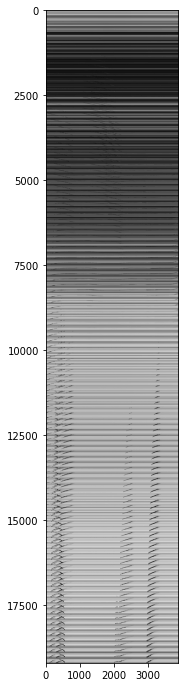

In [13]:
plt.figure(figsize=(12, 12))
plt.imshow(X, cmap='gray')

Every column of matrix X corresponds to a frame in video (every second is 100 frames), we can recunstruct every frame of the video from matrix X.

Construct 150th frame, reshape the 150th column of X into dimensions of video (`dims`) to get frame number 150:

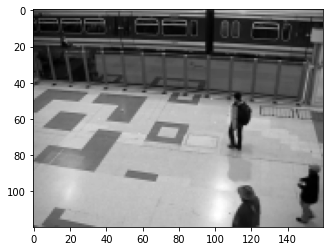

In [28]:
sample_frame = 150

sample_img = X[0:X.shape[0] ,sample_frame].reshape(dims)
plt.imshow(sample_img, cmap='gray');

We will use SVD decomposition to make $ \bf U , \bf \Sigma,  \bf V$, using these matrices we will form an approximation of the original matrix X. 

since matrix X is big, using `svd` function that we defined in Excersice1 takes a very long time. we can use Randomized SVD which finds a (usually very good) approximate singular value decomposition using randomization to speed up the computations. It is particularly fast on large matrices on which you wish to extract only a small number of components. in our case we only need rank 1 and 2 approximation of matrix X, so using Randomized SVD speeds up the decomposition.

### Rank 2 approximation

In [29]:
from sklearn import decomposition

In [43]:
rank = 2
u, s, v = decomposition.randomized_svd(X, rank)
s = np.diag(s)

In [31]:
u.shape, s.shape, v.shape

((19200, 2), (2, 2), (2, 3900))

Compute rank 2 approximation of matrix X:

In [39]:
X_approx = u @ s @ v
X_approx.shape

(19200, 3900)

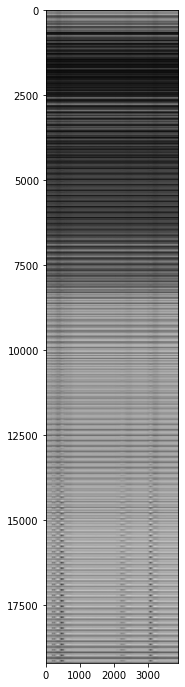

In [40]:
plt.figure(figsize=(12, 12))
plt.imshow(X_approx, cmap='gray')

Now lets try to take one column from approxmiated matrix and reshape it to the shape of frame taken from the video. The approximated frame show the background in the video, because the approximated matrix contains the common part on all frames of the video and obviously background is the most common part in all 3900 frames of the video.

Extract `sample_frame` from the approximated matrix:

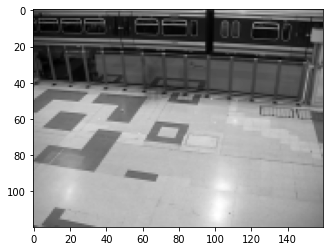

In [44]:
sample_img_approx = X_approx[0:X_approx.shape[0] ,sample_frame].reshape(dims)
plt.imshow(sample_img_approx, cmap='gray')

For extracting the foreground in the `sample_frame` we need to remove the background from the actual frame (remove the approximated image from the original image): 

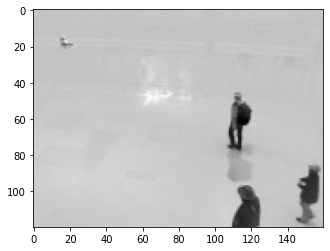

In [45]:
sample_img_foreground = sample_img - sample_img_approx
plt.imshow(sample_img_foreground, cmap='gray')

## Rank 1 approximation

In [46]:
rank = 1
u, s, v = decomposition.randomized_svd(X, rank)
s = np.diag(s)

In [47]:
u.shape, s.shape, v.shape

((19200, 1), (1, 1), (1, 3900))

Compute rank 1 approximation of matrix X:

In [48]:
X_approx = u @ s @ v
X_approx.shape

(19200, 3900)

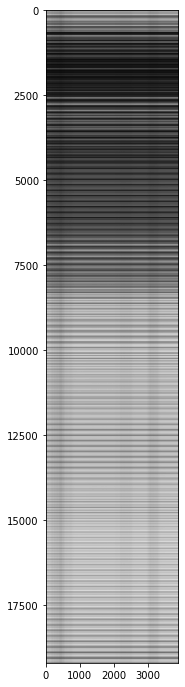

In [49]:
plt.figure(figsize=(12, 12))
plt.imshow(X_approx, cmap='gray')

Extract foreground of `sample_frame` for rank 1 approximation:

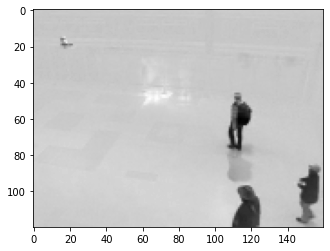

In [50]:
sample_img_approx = X_approx[0:X_approx.shape[0] ,sample_frame].reshape(dims)
sample_img_foreground = sample_img - sample_img_approx

plt.imshow(sample_img_foreground, cmap='gray')

What's the difference between the output of rank 1 and rank 2 approximation?

$$Same  output$$

In [62]:
from moviepy.video.io.bindings import mplfig_to_npimage

# since the video matrix is in grayscale, converting it to a standard video messes up the color scale (it can be ignored)
def matrix_to_video(matrix, dims, filename):
    frame_seq_matrix = np.reshape(matrix, (dims[0], dims[1], -1))
    
    fig, ax = plt.subplots()
    def make_frame(t):
        ax.clear()
        ax.imshow(frame_seq_matrix[...,int(t*fps)])
        return mplfig_to_npimage(fig)
    
    animation = mpe.VideoClip(make_frame, duration=int(duration))
    animation.write_videofile(filename + '.mp4', fps=fps)

Run the following functions to create the segmented videos:

[MoviePy] >>>> Building video FUM-foreground.mp4
[MoviePy] Writing video FUM-foreground.mp4


100%|█████████▉| 3900/3901 [06:09<00:00, 10.55it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: FUM-foreground.mp4 



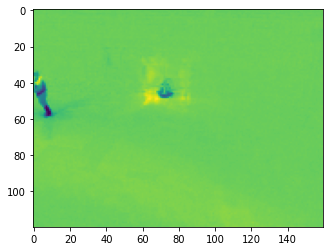

In [52]:
matrix_to_video(X - X_approx, dims, "FUM-foreground")

[MoviePy] >>>> Building video FUM-background.mp4
[MoviePy] Writing video FUM-background.mp4


100%|█████████▉| 3900/3901 [05:57<00:00, 10.91it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: FUM-background.mp4 



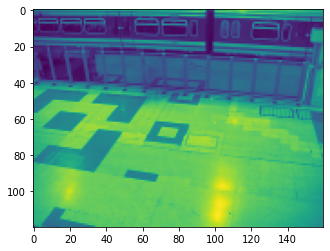

In [63]:
matrix_to_video(X_approx, dims, "FUM-background")

<!-- END QUESTION -->

> This document was compiled, gathered and coded by the teaching assistant team and may be used only for educational purposes. The authors would like to thank the many projects and educational material that made their source code freely available on the internet, especially otter-grader that made the generation and sanitization of the notebook easier.